In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import cv2 
import os
from pathlib import Path
import json
%matplotlib inline

In [25]:
dir = '/root/capsule/data/behavior_711042_2024-09-13_09-19-15/behavior-videos/bottom_camera.avi'

In [54]:
def video_info_check(dir):
    base_name = os.path.splitext(os.path.basename(dir))[0]
    path_name = os.path.dirname(dir)
    video_info = dict()
    video_info['video_file'] = dir
    video_info['video_exist'] = os.path.exists(video_info['video_file'])
    video_info['timestamps_file'] = os.path.join(path_name, f"{base_name}.csv")
    video_info['timestamps_exist'] = os.path.exists(video_info['timestamps_file'])
    return video_info  

In [32]:
video_info = video_info_check(dir)
with open("video_qm.json", "w") as json_file:
    json.dump(video_info, json_file, indent=4, sort_keys=True)

In [104]:
def cal_video_temporal_qm(video_info):
    video_temporal_qm = dict()
    video_temporal_qm['IFI_cdf_quantile'] = np.arange(0, 105, 5)
    video_temporal_qm['IFI_cdf_value'] = None
    video_temporal_qm['IFI_range'] = None
    video_temporal_qm['ITI_cdf_quantile'] = np.arange(0, 105, 5)
    video_temporal_qm['ITI_cdf_value'] = None
    video_temporal_qm['ITI_range'] = None
    video_temporal_qm['frame_count'] = None
    video_temporal_qm['timestampe_count'] = None
    hist_iti = None
    hist_ifi = None
    if not video_info['video_exist']:
        raise ValueError('Target video does not exist')
    else:
        video = cv2.VideoCapture(video_info['video_file'])
        video_temporal_qm['frame_count'] = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        if video_info['timestamps_exist']:
            video_meta_data = pd.read_csv(video_info['timestamps_file'], header = None)
            video_temporal_qm['timestampe_count'] = len(video_meta_data)
            ITI = np.diff(video_meta_data[0]*1000)
            IFI = np.diff(video_meta_data[2]/1000000)
            video_temporal_qm['IFI_cdf_value'] = np.percentile(IFI, video_temporal_qm['IFI_cdf_quantile'])
            video_temporal_qm['ITI_cdf_value'] = np.percentile(ITI, video_temporal_qm['ITI_cdf_quantile'])
            video_temporal_qm['IFI_range'] = [np.min(IFI), np.max(IFI)]
            video_temporal_qm['ITI_range'] = [np.min(ITI), np.max(ITI)]
            hist_joint_all = sns.jointplot(x = ITI, y = IFI, kind = 'hist', bins = 10,
                       stat='probability',marginal_ticks=True, 
                       marginal_kws=dict(bins=20, fill=True, stat='probability')).set_axis_labels(xlabel = 'Harp time (ms)', ylabel='Camera time')
            mode_range  = (ITI>=video_temporal_qm['ITI_cdf_value'][1]) & (ITI<=video_temporal_qm['ITI_cdf_value'][-2]) & (IFI>=video_temporal_qm['IFI_cdf_value'][1]) & (IFI <=video_temporal_qm['IFI_cdf_value'][-2])
            mode_range  = (ITI<=video_temporal_qm['ITI_cdf_value'][-2]) & (IFI<=video_temporal_qm['IFI_cdf_value'][-2])
            hist_joint_peak = sns.jointplot(x = ITI[mode_range], y = IFI[mode_range], kind = 'hist', bins = 10,
                       stat='probability',marginal_ticks=True, 
                       marginal_kws=dict(bins=20, fill=True, stat='probability')).set_axis_labels(xlabel = 'Harp time (ms)', ylabel='Camera time')
            hist_iti, ax = plt.subplots()
            ax.hist(ITI, bins=30)
            hist_ifi, ax = plt.subplots()
            ax.hist(IFI, bins=30)
    return hist_iti, hist_ifi, hist_joint_all, hist_joint_peak, video_temporal_qm

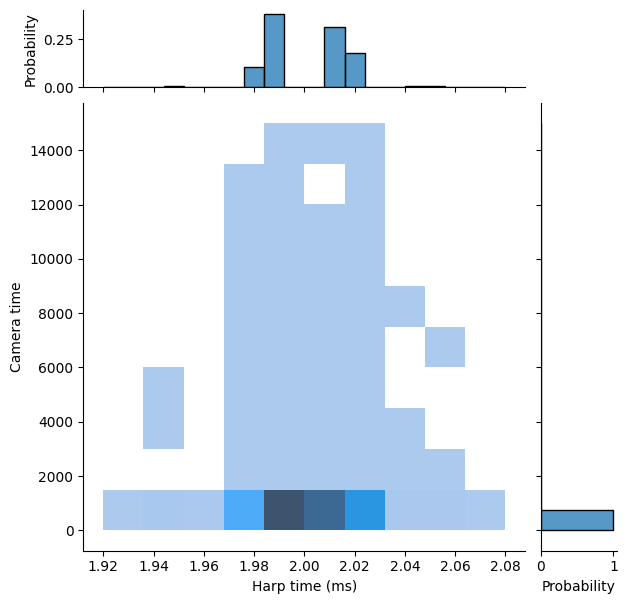

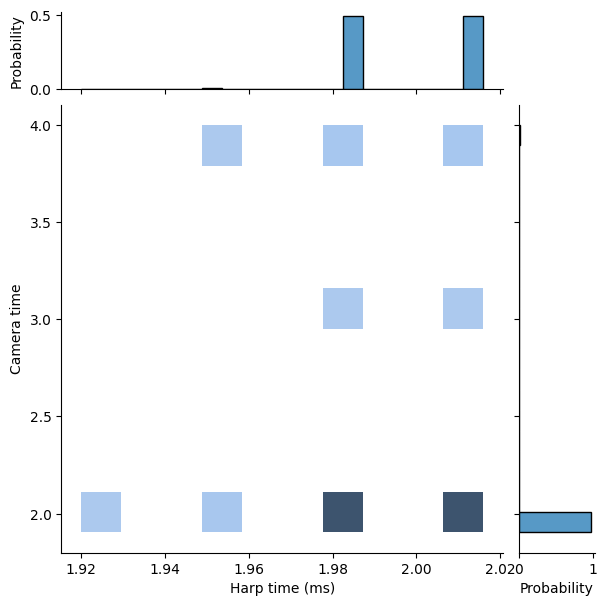

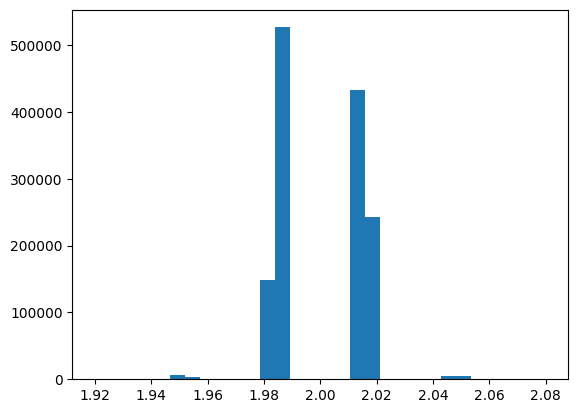

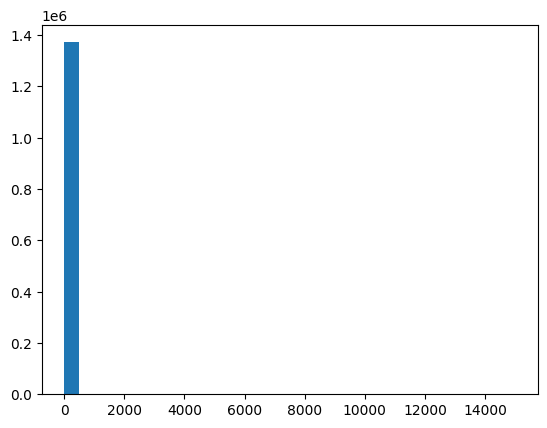

In [105]:
hist_iti, hist_ifi, hist_joint, hist_joint_peak, video_temporal_qm = cal_video_temporal_qm(video_info)

In [106]:
video_temporal_qm

{'IFI_cdf_quantile': array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 'IFI_cdf_value': array([1.90375233e+00, 1.99692059e+00, 1.99878407e+00, 1.99894333e+00,
        1.99903202e+00, 1.99913597e+00, 1.99923992e+00, 1.99932003e+00,
        1.99940014e+00, 1.99948788e+00, 1.99956799e+00, 1.99967194e+00,
        1.99978352e+00, 1.99991989e+00, 2.00008011e+00, 2.00216007e+00,
        2.00259209e+00, 2.00286388e+00, 2.00319195e+00, 3.99870396e+00,
        1.50018551e+04]),
 'IFI_range': [np.float64(1.903752326965332), np.float64(15001.855055809021)],
 'ITI_cdf_quantile': array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 'ITI_cdf_value': array([1.92000008, 1.98399925, 1.98399925, 1.98400021, 1.98400021,
        1.98400021, 1.98400021, 1.98400021, 1.98400021, 1.98400021,
        1.98400116, 2.01599884, 2.01599979, 2.01599979, 2.01599979,
        2.0